# Classification Intuition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_regression
import seaborn as sns
from mpl_toolkits import mplot3d
import tensorflow as tf

i need to see a decision boundary. 

What if I get all the datapoints in the canvas and predict the result for the data point ?

Wont it give me decision ability of the model ????

Lets try it

In [2]:
def plot_decision_boundary(model, df, size=4):
    loc_points = np.linspace(-size,size)
    all_points = np.array(np.meshgrid(loc_points, loc_points)).T.reshape(-1, 2)
    probs = model.predict(all_points)

    for i in probs.T:
        sns.scatterplot(x=all_points[...,0], y=all_points[...,1], hue=i,\
                        palette='viridis',legend=False)
        sns.scatterplot(data = df, x = 'x1', y='x2', hue='y',palette='dark')
        plt.show()

## Basic Classification

Target here to generate a data that has only two classes and it can be classified by a linear model also. Like a linear hyperplane can also be a good decision boundary.

(500, 2) (500,)


<AxesSubplot:xlabel='x1', ylabel='x2'>

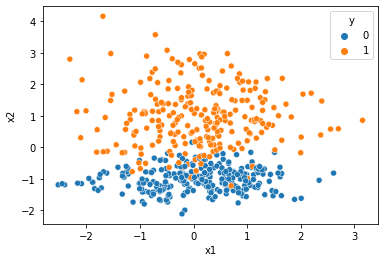

In [18]:
X, y = make_classification(n_samples=500, n_features=2, random_state=30, \
                           n_informative=1, n_classes=2, n_clusters_per_class=1, \
                           n_repeated=0, n_redundant=0)

print(X.shape, y.shape)

df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = y

sns.scatterplot(data=df,x='x1',y='x2',hue='y')

This is prety much it. linearly classifiable data with 2 classes.

### Logistic Regression with Neural network (sigmoid)

logistic regression is like a linear classification model. 

\begin{align}
    y &= g(h(x))\\
    h(x) &= w x + b\\
    \text{sigmoid } g(x) &= \frac{1}{1 + e^{-x}}
\end{align}

So, actually after a linear weight and bias model, we need a sigmoid. It is actually called a perceptron.

<AxesSubplot:xlabel='x1', ylabel='x2'>

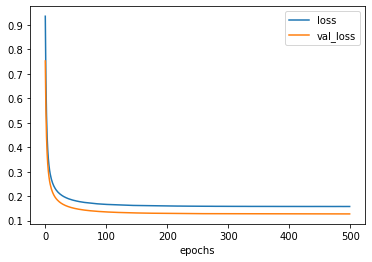

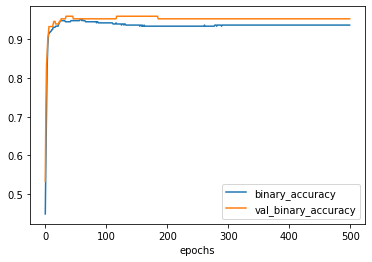

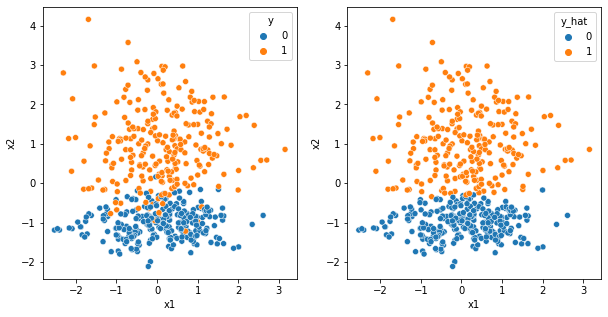

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.09),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])



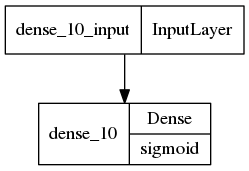

In [20]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

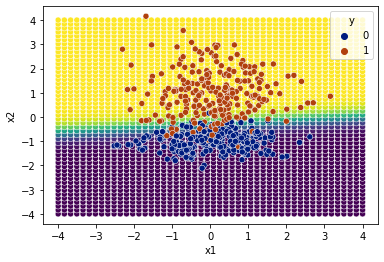

In [21]:
plot_decision_boundary(model,df,size=4)

Looks to me that it worked out.

### 2 sigmoid layers

In [22]:
x1, x2 = make_regression(n_features=1,noise=10, random_state=0, n_samples=500)

x2 = (x2/100)**2

<AxesSubplot:xlabel='x1', ylabel='x2'>

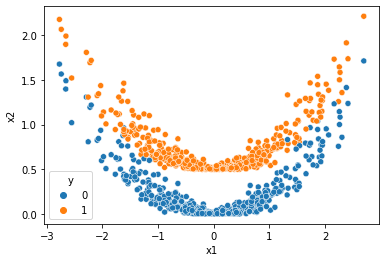

In [24]:
df1 = pd.DataFrame()
df1['x1'] = x1[...,-1]
df1['x2'] = x2
df1['y'] = 0

df2 = pd.DataFrame()
df2['x1'] = x1[...,-1]
df2['x2'] = x2 + 0.5
df2['y'] = 1


df = pd.concat((df1,df2)).sample(frac=1)

sns.scatterplot(data=df,x='x1',y='x2',hue='y')

<AxesSubplot:xlabel='x1', ylabel='x2'>

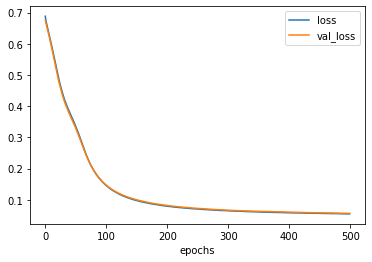

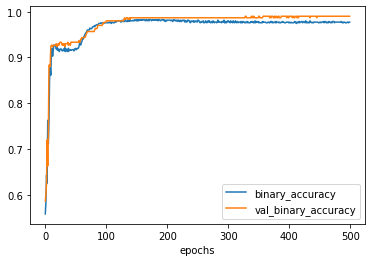

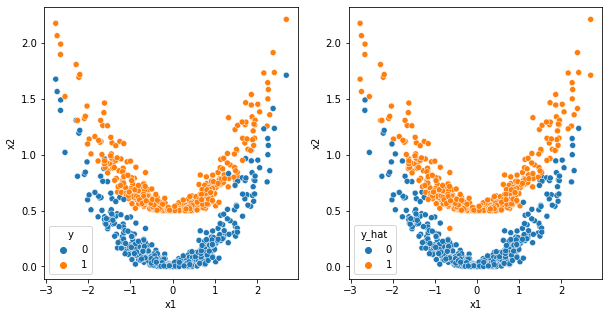

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

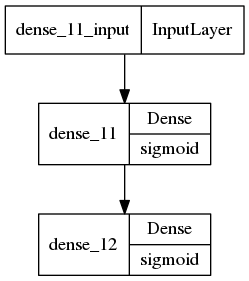

In [26]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

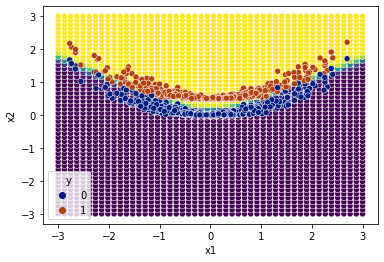

In [27]:
plot_decision_boundary(model,df,size=3)

### 3 sigmoid layers

<AxesSubplot:xlabel='x1', ylabel='x2'>

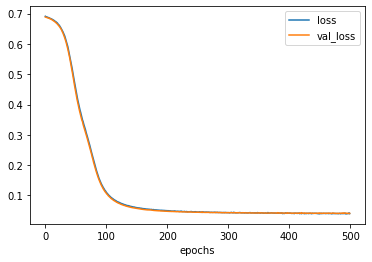

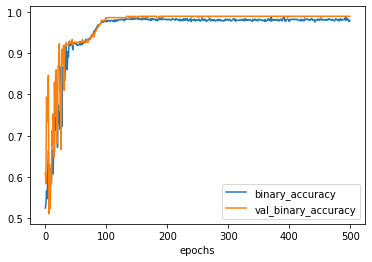

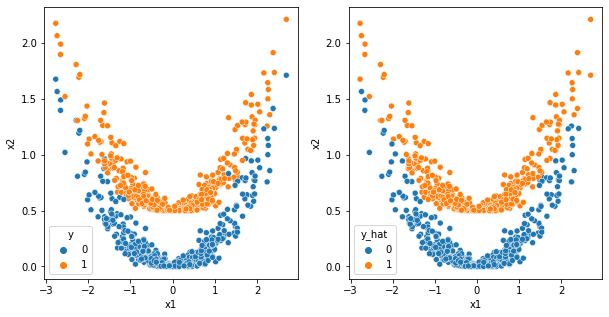

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

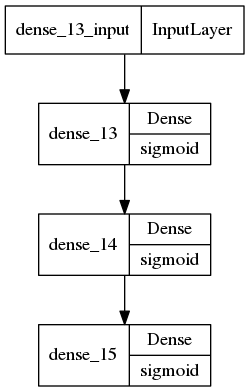

In [29]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

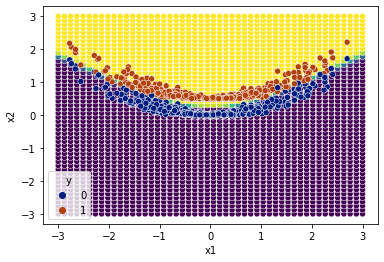

In [30]:
plot_decision_boundary(model,df,size=3)

### Something with Softmax

for using softmax i'll have to one hot encode the target.. so in the final layers we can have two outputs

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
ohe = OneHotEncoder()
ohe.fit(df[['y']].values)

y_ohe = ohe.transform(df[['y']].values).toarray()

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3
)

<AxesSubplot:xlabel='epochs'>

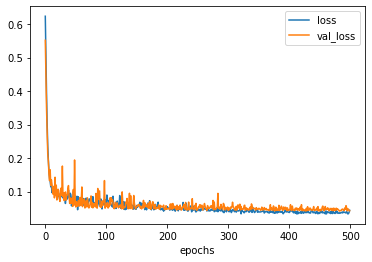

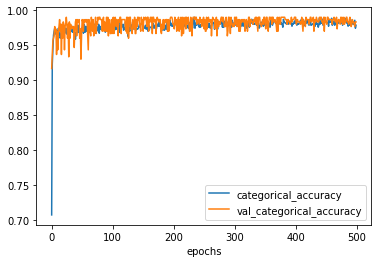

In [34]:
history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

In [35]:
y_hat = np.argmax(model.predict(df[['x1','x2']].values),axis=1)

In [36]:
df['y_hat'] = y_hat

<AxesSubplot:xlabel='x1', ylabel='x2'>

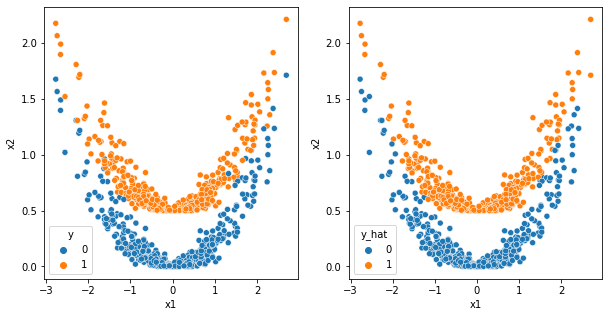

In [37]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

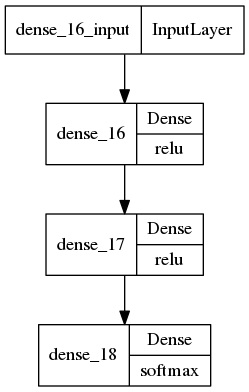

In [38]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

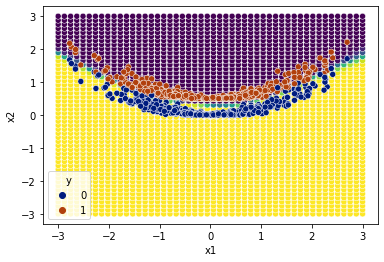

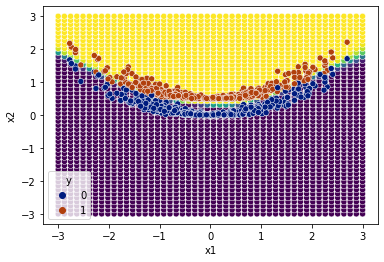

In [39]:
plot_decision_boundary(model,df,size=3)

## Easy Spiral Classification

In [67]:
data_limit = 30

<AxesSubplot:xlabel='x1', ylabel='x2'>

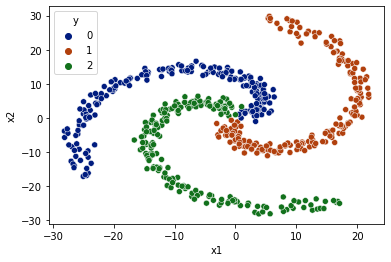

In [68]:
theta = (3 * np.pi) / 4

# rotation matrix
rotation_matrix = np.array([
    [ np.cos(theta), -np.sin(theta) ],
    [ np.sin(theta), np.cos(theta) ]
])

x1 = np.array([
    [
        (np.cos(i/8) * i) + np.random.randn(),(np.sin(i/8) * i) + np.random.randn()
    ] for i in np.linspace(2,data_limit,200)
])
x2 = x1 @ rotation_matrix
x3 = x2 @ rotation_matrix

df1 = pd.DataFrame(x1, columns=['x1','x2'])
df1['y'] = 0

df2 = pd.DataFrame(x2, columns=['x1','x2'])
df2['y'] = 1

df3 = pd.DataFrame(x3, columns=['x1','x2'])
df3['y'] = 2

df = pd.concat([df1,df2,df3]).sample(frac=1)

sns.scatterplot(data=df, x='x1',y='x2',hue='y',palette='dark')

In [69]:
ohe = OneHotEncoder()
ohe.fit(df[['y']].values)

y_ohe = ohe.transform(df[['y']].values).toarray()

### 1 sigmoid

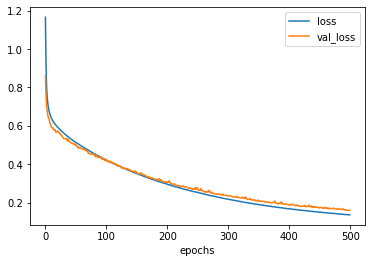

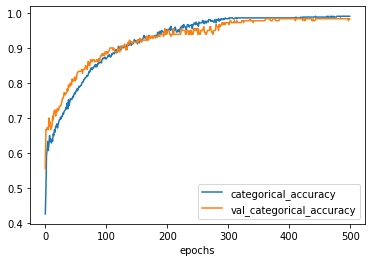

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

df['y_hat'] = np.argmax(model.predict(df[['x1','x2']].values), axis=1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

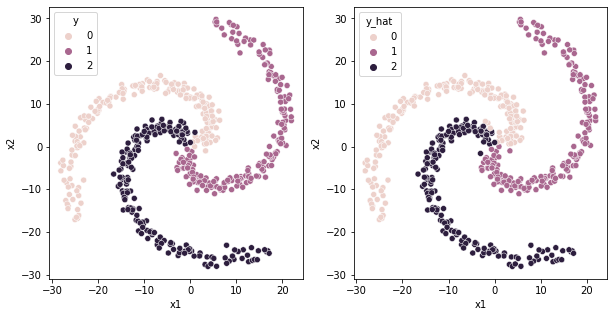

In [87]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

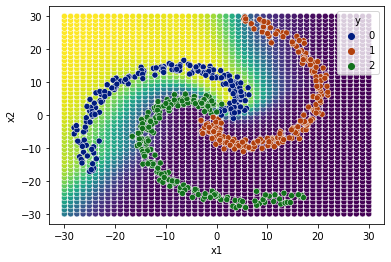

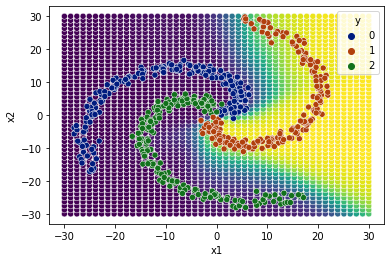

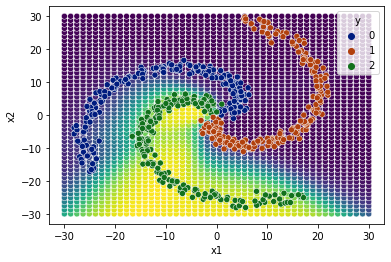

In [88]:
plot_decision_boundary(model,df,size=data_limit)

### 2 sigmoids

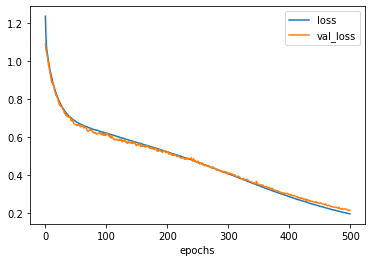

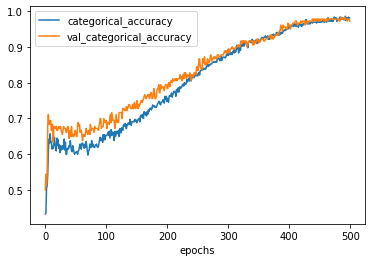

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

df['y_hat'] = np.argmax(model.predict(df[['x1','x2']].values), axis=1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

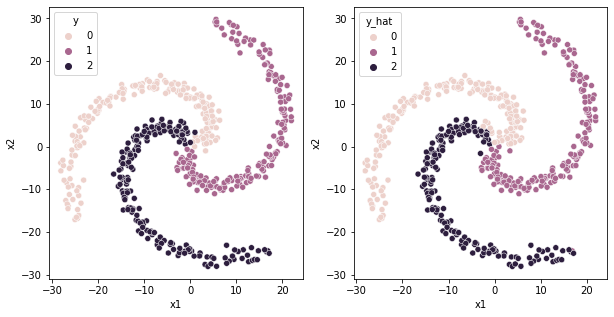

In [80]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

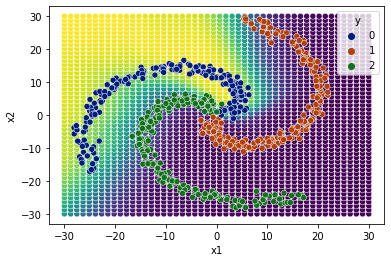

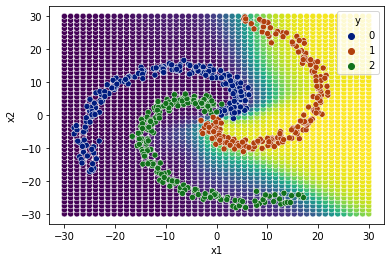

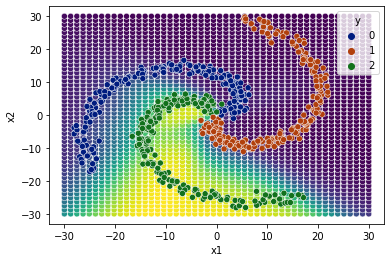

In [81]:
plot_decision_boundary(model,df,size=data_limit)

### 1 relu layer

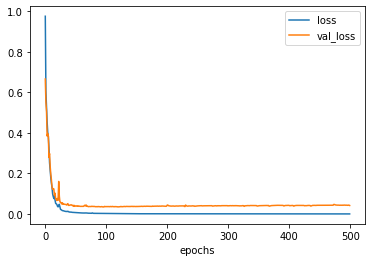

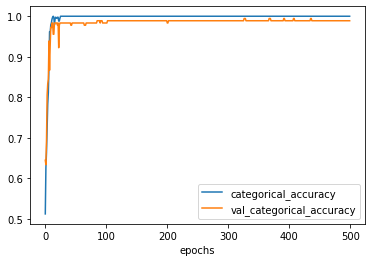

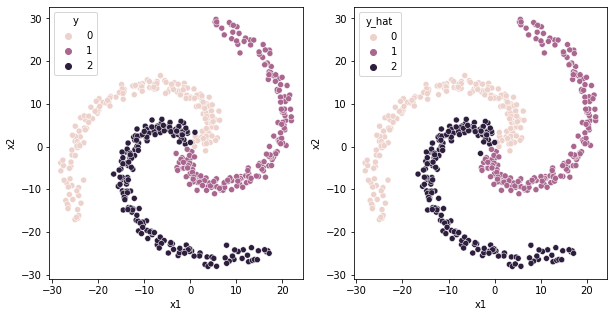

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

df['y_hat'] = np.argmax(model.predict(df[['x1','x2']].values), axis=1)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])
plt.show()

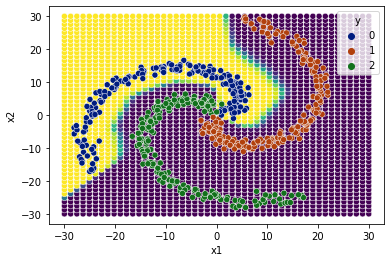

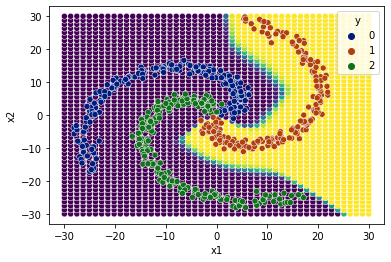

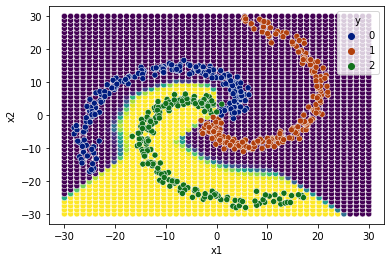

In [90]:
plot_decision_boundary(model,df,size=data_limit)

### 2 relu layers

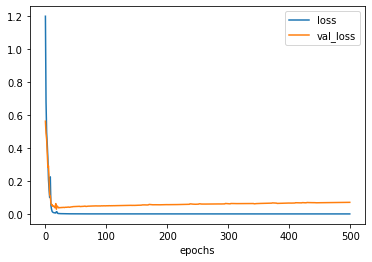

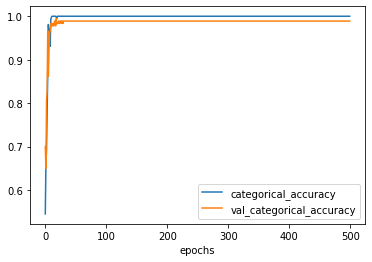

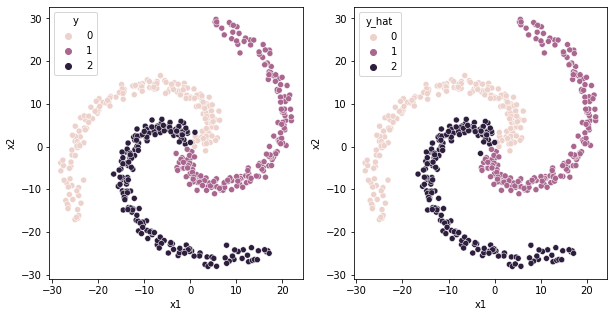

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

df['y_hat'] = np.argmax(model.predict(df[['x1','x2']].values), axis=1)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])
plt.show()

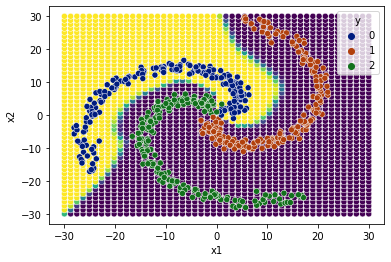

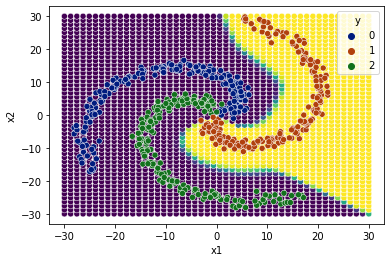

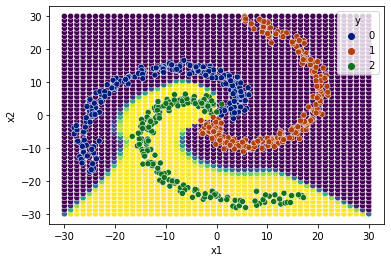

In [83]:
plot_decision_boundary(model,df,size=data_limit)

## Complex Spiral Classification

In [91]:
data_limit = 100

<AxesSubplot:xlabel='x1', ylabel='x2'>

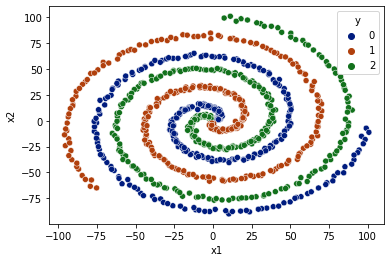

In [93]:
theta = (3 * np.pi) / 4

# rotation matrix
rotation_matrix = np.array([
    [ np.cos(theta), -np.sin(theta) ],
    [ np.sin(theta), np.cos(theta) ]
])

x1 = np.array([
    [
        (np.cos(i/8) * i) + np.random.randn(),(np.sin(i/8) * i) + np.random.randn()
    ] for i in np.linspace(2,data_limit,300)
])
x2 = x1 @ rotation_matrix
x3 = x2 @ rotation_matrix

df1 = pd.DataFrame(x1, columns=['x1','x2'])
df1['y'] = 0

df2 = pd.DataFrame(x2, columns=['x1','x2'])
df2['y'] = 1

df3 = pd.DataFrame(x3, columns=['x1','x2'])
df3['y'] = 2

df = pd.concat([df1,df2,df3]).sample(frac=1)

sns.scatterplot(data=df, x='x1',y='x2',hue='y',palette='dark')

In [96]:
ohe = OneHotEncoder()
ohe.fit(df[['y']].values)

y_ohe = ohe.transform(df[['y']].values).toarray()

### 1 relu layer

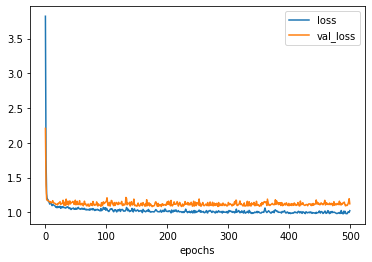

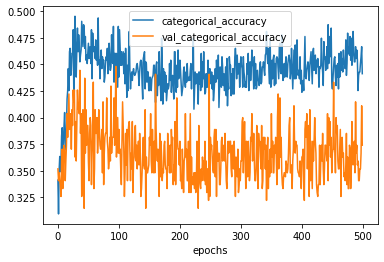

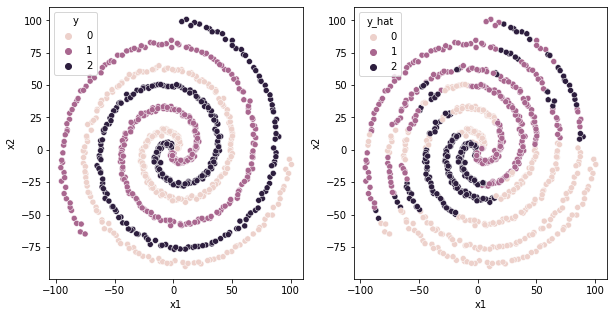

In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

df['y_hat'] = np.argmax(model.predict(df[['x1','x2']].values), axis=1)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])
plt.show()

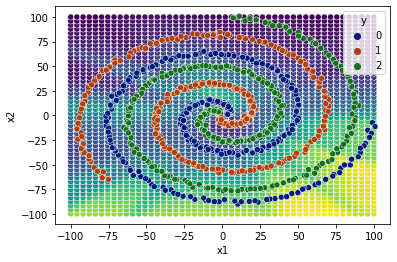

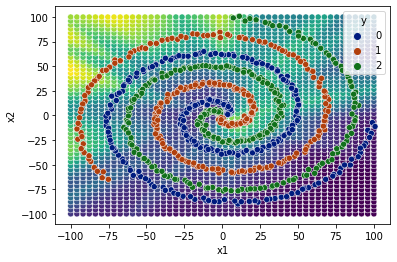

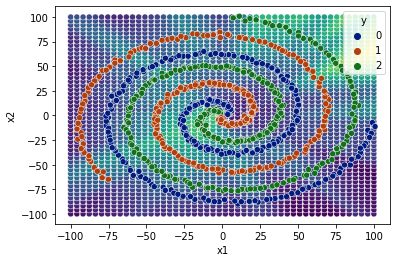

In [100]:
plot_decision_boundary(model,df,size=data_limit)

### 2 relu layer

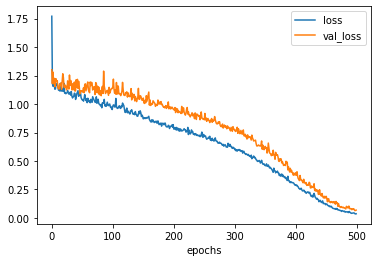

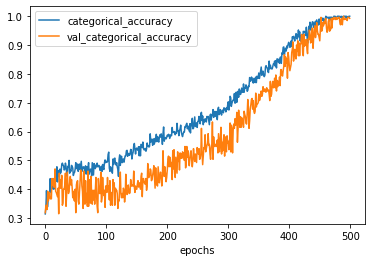

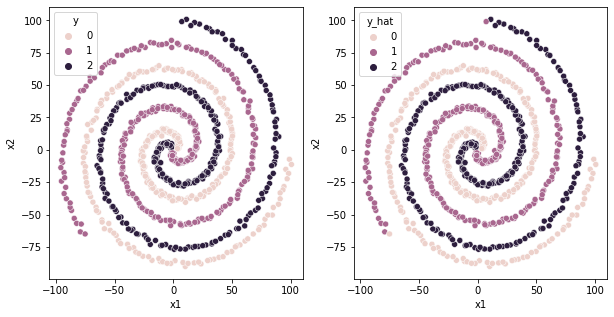

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

df['y_hat'] = np.argmax(model.predict(df[['x1','x2']].values), axis=1)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])
plt.show()

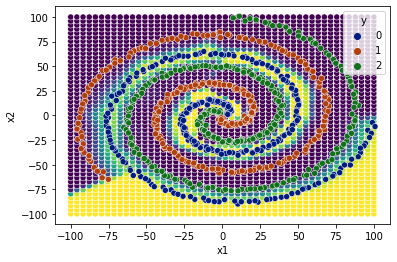

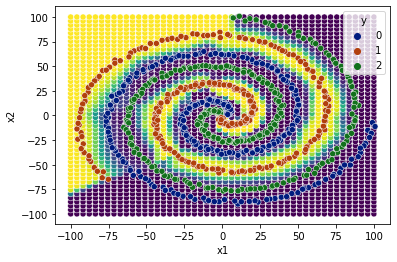

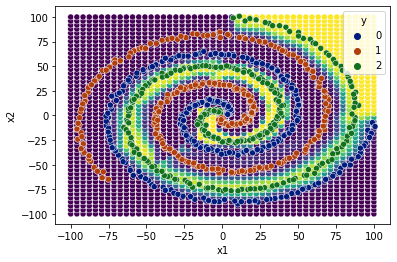

In [104]:
plot_decision_boundary(model,df,size=data_limit)

### A little bit complex model

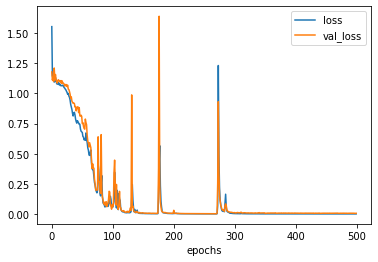

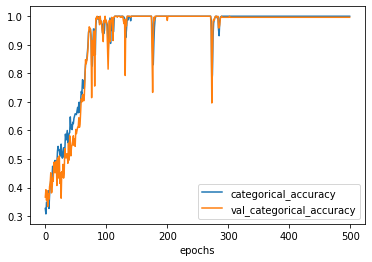

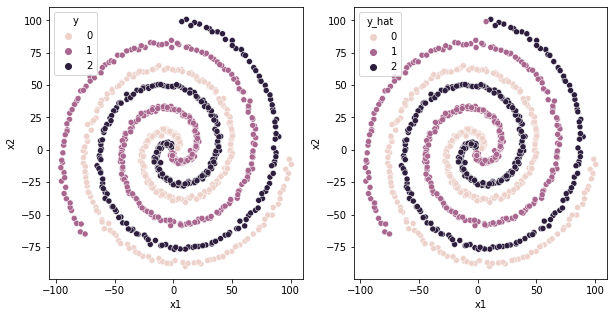

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

df['y_hat'] = np.argmax(model.predict(df[['x1','x2']].values), axis=1)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])
plt.show()

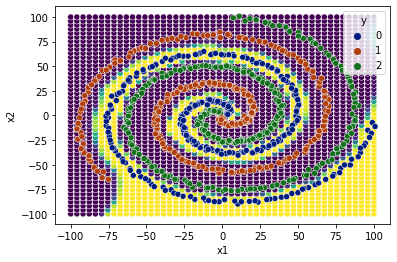

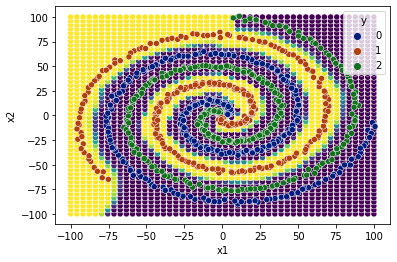

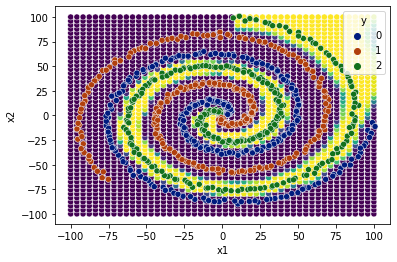

In [102]:
plot_decision_boundary(model,df,size=data_limit)